In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pylab as plt
from sklearn import datasets, model_selection, ensemble, metrics
#import xgboost as xgb
import lightgbm as lgb
import shap

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
# load JS visualization code to notebook
shap.initjs()

In [182]:
# 回帰系

boston = datasets.load_boston()
df_boston = pd.DataFrame(data=np.c_[boston['data'], boston['target']], columns=boston['feature_names'].tolist() + ['target'])
display(df_boston.head())

train_X, valid_X, train_y, valid_y = model_selection.train_test_split(df_boston[boston['feature_names'].tolist()], df_boston[['target']], test_size=0.2, random_state=42)
print(train_X.shape, valid_X.shape, train_y.shape, valid_y.shape)

model = lgb.LGBMRegressor()
model.fit(train_X, train_y)

print('MSE train: %.3f, valid: %.3f' % (
    metrics.mean_squared_error(train_y, model.predict(train_X)),
    metrics.mean_squared_error(valid_y, model.predict(valid_X))
))
print('R^2 train: %.3f, valid: %.3f' % (
    metrics.r2_score(train_y, model.predict(train_X)),
    metrics.r2_score(valid_y, model.predict(valid_X))
))

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(train_X)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


(404, 13) (102, 13) (404, 1) (102, 1)
MSE train: 2.321, valid: 8.428
R^2 train: 0.973, valid: 0.885


In [183]:
for i in range(5):
    print(train_y.iloc[i,:])
    display(shap.force_plot(explainer.expected_value, shap_values[i,:], train_X.iloc[i,:]))

target    12.0
Name: 477, dtype: float64


target    19.9
Name: 15, dtype: float64


target    19.4
Name: 332, dtype: float64


target    13.4
Name: 423, dtype: float64


target    18.2
Name: 19, dtype: float64


In [184]:
shap.force_plot(explainer.expected_value, shap_values, train_X)

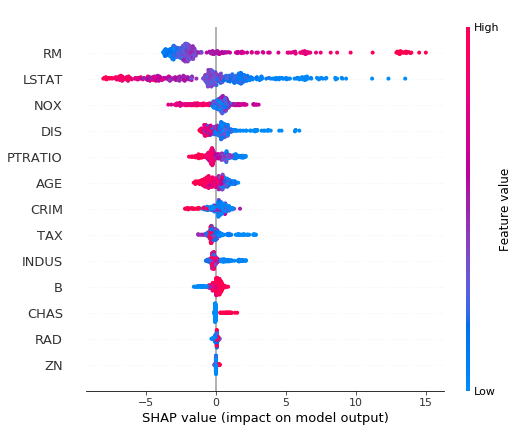

In [148]:
shap.summary_plot(shap_values, train_X)

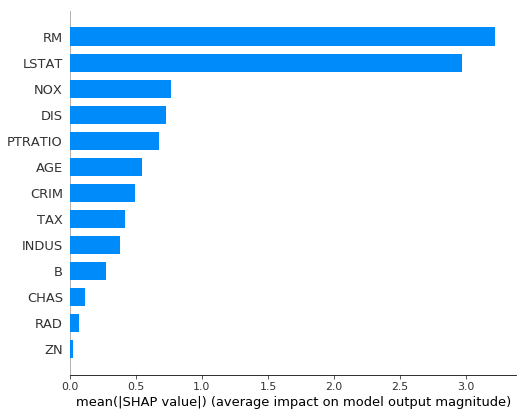

In [158]:
shap.summary_plot(shap_values, train_X, plot_type='bar')

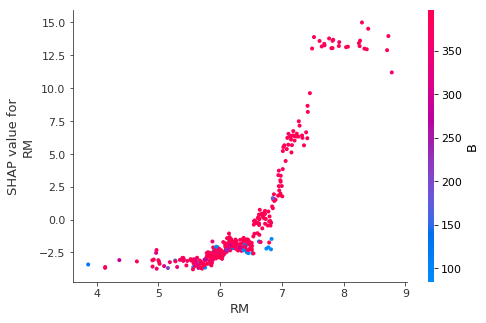

In [155]:
shap.dependence_plot('RM', shap_values, train_X)

In [169]:
shap_interaction_values = explainer.shap_interaction_values(train_X)

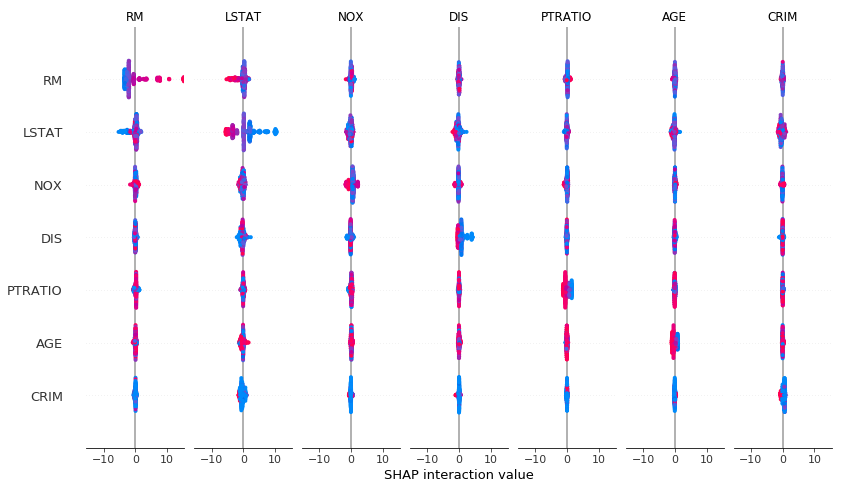

In [170]:
shap.summary_plot(shap_interaction_values, train_X)

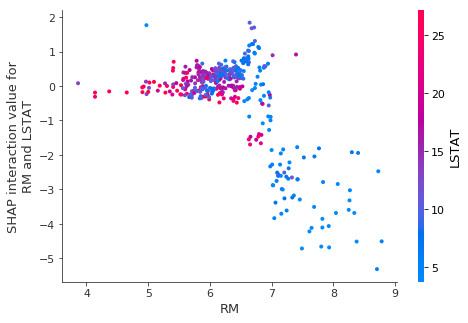

In [171]:
shap.dependence_plot(('RM', 'LSTAT'), shap_interaction_values, train_X)

In [15]:
# 分類系

iris = datasets.load_iris()
df_iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])
display(df_iris.head())

train_X, valid_X, train_y, valid_y = model_selection.train_test_split(df_iris[iris['feature_names']], df_iris[['target']], test_size=0.2, random_state=42)
print(train_X.shape, valid_X.shape, train_y.shape, valid_y.shape)

model = lgb.LGBMClassifier() # ここでワーニング
model.fit(train_X, train_y) # ここでワーニング

print('Accuracy train: %.3f, valid: %.3f' % (
    metrics.accuracy_score(train_y, model.predict(train_X)), # ここでワーニング
    metrics.accuracy_score(valid_y, model.predict(valid_X)) # ここでワーニング
))

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(train_X)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


(120, 4) (30, 4) (120, 1) (30, 1)
Accuracy train: 0.992, valid: 0.933


/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an err

In [11]:
shap.force_plot(explainer.expected_value[0], shap_values[0][0,:], train_X.iloc[0,:])

In [10]:
print(train_y.iloc[0,:])
for i in range(3):
    display(shap.force_plot(explainer.expected_value[i], shap_values[i][0,:], train_X.iloc[0,:]))

target    0.0
Name: 22, dtype: float64


In [181]:
print(train_y.iloc[0,:])
shap.force_plot(explainer.expected_value[2], shap_values[1][0,:], train_X.iloc[0,:])

target    0.0
Name: 22, dtype: float64


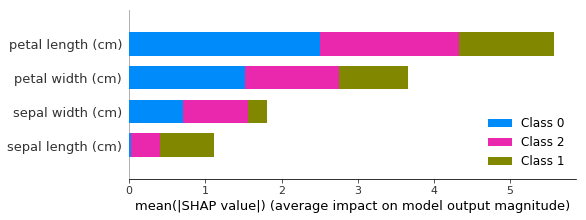

In [164]:
shap.summary_plot(shap_values, train_X)

In [165]:
explainer.expected_value

[-1.650498713435368, -0.5136782112942386, -1.5463708827086076]